In [8]:
import matplotlib.pyplot as plt
from tsp_solve import branch_and_bound, dfs
from tsp_full_details import generate_network, Timer

In [9]:
size = 13
max_time = 180

In [10]:
bb_coverages = []
bb_times = []
bt_coverages = []
bt_times = []

locations, edges = generate_network(
size,
euclidean=True,
reduction=0.2,
normal=False,
seed=312,
)

bb_stats = branch_and_bound(edges, Timer(max_time))
bt_stats = dfs(edges, Timer(max_time))


for stat in bb_stats:
    bb_coverages.append(stat.n_leaves_covered)
    bb_times.append(stat.time)

for stat in bt_stats:
    bt_coverages.append(stat.n_leaves_covered)
    bt_times.append(stat.time)


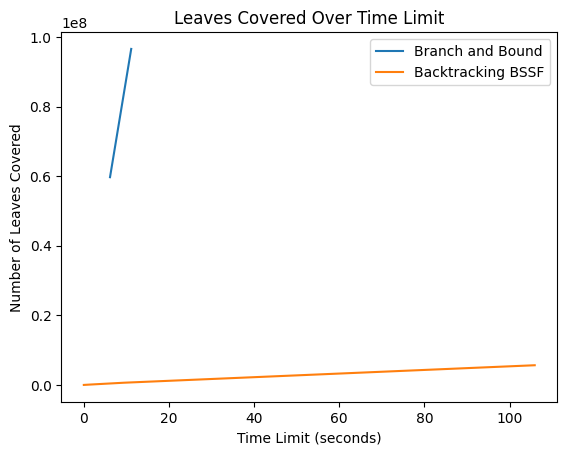

Branch and Bound Coverage: [59715835, 96585679]
[6.151846408843994, 11.131402492523193]
[SolutionStats(tour=[0, 9, 6, 11, 8, 1, 12, 10, 5, 2, 3, 4, 7], score=np.float64(3.6439999999999992), time=6.151846408843994, max_queue_size=47, n_nodes_expanded=127637, n_nodes_pruned=100592, n_leaves_covered=59715835, fraction_leaves_covered=0.12466729756226284), SolutionStats(tour=[0, 6, 11, 9, 8, 1, 12, 10, 5, 2, 3, 4, 7], score=np.float64(3.582), time=11.131402492523193, max_queue_size=47, n_nodes_expanded=239054, n_nodes_pruned=188454, n_leaves_covered=96585679, fraction_leaves_covered=0.2016395748991235)]


In [11]:
plt.clf()
plt.plot(bb_times, bb_coverages, label='Branch and Bound')
plt.plot(bt_times, bt_coverages, label='Backtracking BSSF')
plt.xlabel('Time Limit (seconds)')
plt.ylabel('Number of Leaves Covered')
plt.title('Leaves Covered Over Time Limit')
plt.legend()
plt.show()

print("Branch and Bound Coverage:", bb_coverages)
print(bb_times)

print(bb_stats)